In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPool2D, Dense

In [ ]:
# load and split the fashion dataset
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

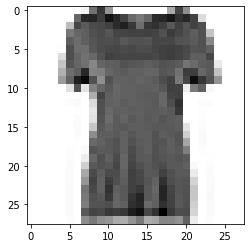

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[10], cmap = plt.cm.binary)

In [ ]:
print(str(X_train.min()))
print(str(X_train.max()))

0
255


In [ ]:
# normalize the pixel values
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
Y_train.shape

(60000,)

In [ ]:
Y_test.shape

(10000,)

In [ ]:
# make the Y variables categorical
from keras.utils import to_categorical
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
Y_train.shape

(60000, 10)

In [ ]:
# set up the model for the fashion data
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', input_shape = (28, 28, 1)))
model.add(MaxPool2D(2, 2))
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
# compile and fit the model for the fashion data
model.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs = 50, validation_data = (X_test, Y_test), batch_size = 32, verbose = 1)

Epoch 1/50
1875/1875 [==============================] - 9s 4ms/step - loss: 0.1606 - accuracy: 0.7147 - val_loss: 0.1158 - val_accuracy: 0.7811
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1019 - accuracy: 0.8097 - val_loss: 0.0966 - val_accuracy: 0.8133
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0895 - accuracy: 0.8319 - val_loss: 0.0912 - val_accuracy: 0.8235
Epoch 4/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0834 - accuracy: 0.8425 - val_loss: 0.0857 - val_accuracy: 0.8352
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0793 - accuracy: 0.8508 - val_loss: 0.0841 - val_accuracy: 0.8392
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0762 - accuracy: 0.8562 - val_loss: 0.0789 - val_accuracy: 0.8474
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0738 - accuracy: 0.8605 - val_loss: 0.0788 - val_accuracy:

In [ ]:
# check the accuracy of the model for the fashion data
loss,accuracy=model.evaluate(X_test,Y_test,verbose=1)

loss, acc = model.evaluate(X_test, Y_test, verbose = 0)
print('Test accuracy: %.3f' %acc)

loss, acc = model.evaluate(X_train, Y_train, verbose = 0)
print('Train accuracy: %.3f' %acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0537 - accuracy: 0.8972
Test accuracy: 0.897
Train accuracy: 0.920


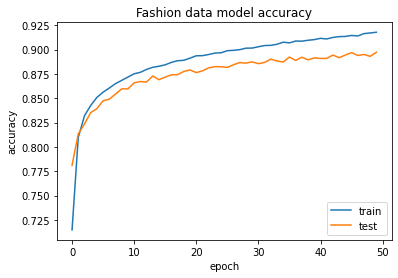

In [ ]:
# graph the accuracy of the fashion data model
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Fashion data model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'lower right')
plt.show()